In [1]:
# import requirements
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# import requirements
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time

import copy


# choose problem formulation number
# between 0-5
dike_model, planning_steps = get_model_for_problem_formulation(3)

# specify uncertainties
uncertainties = copy.deepcopy(dike_model.uncertainties)

# specify levers
levers = copy.deepcopy(dike_model.levers)

C:\Users\Adli\PycharmProjects\epa141A-model\MBDM\Lib\site-packages\ema_workbench\em_framework\evaluators.py:58: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")


In [2]:
# defining specific policies

def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}

# policies from '../saved_runs/scenarios_for_robustness/deventer_no_dikes.csv' file
policies = [
    Policy(
        "Policy 1 - Without RfR",
        **dict(
            get_do_nothing_dict(),
            **{'0_RfR 0':0,
                '1_RfR 0':0,
                '2_RfR 0':0,
                '3_RfR 0':0,
                '4_RfR 0':0,
                '0_RfR 1':0,
                'EWS_DaysToThreat 0':1,
                'A.1_DikeIncrease 0':0,
                'A.2_DikeIncrease 0':0,
                'A.3_DikeIncrease 0':4,
                'A.4_DikeIncrease 0':3,
                'A.5_DikeIncrease 0':8}
        )
    ),
    Policy(
        "policy 2 - Deventer Dike and RfR 2",
        **dict(
            get_do_nothing_dict(),
            **{'0_RfR 0':0,
                '1_RfR 0':0,
                '2_RfR 0':1,
                '3_RfR 0':0,
                '4_RfR 0':0,
                '0_RfR 1':0,
                'EWS_DaysToThreat 0':0,
                'A.1_DikeIncrease 0':0,
                'A.2_DikeIncrease 0':0,
                'A.3_DikeIncrease 0':0,
                'A.4_DikeIncrease 0':3,
                'A.5_DikeIncrease 0':9}
        )
    ),
    Policy(
        "policy 3 - Deventer Dike and RfR 2,3",
        **dict(
            get_do_nothing_dict(),
            **{'0_RfR 0':0,
                '1_RfR 0':0,
                '2_RfR 0':1,
                '3_RfR 0':1,
                '4_RfR 0':0,
                '0_RfR 1':0,
                'EWS_DaysToThreat 0':1,
                'A.1_DikeIncrease 0':0,
                'A.2_DikeIncrease 0':0,
                'A.3_DikeIncrease 0':2,
                'A.4_DikeIncrease 0':3,
                'A.5_DikeIncrease 0':8}
        )
    ),

    Policy(
        "policy 4 - Deventer Dike and RfR 3",
        **dict(
            get_do_nothing_dict(),
            **{'0_RfR 0':0,
                '1_RfR 0':0,
                '2_RfR 0':0,
                '3_RfR 0':1,
                '4_RfR 0':0,
                '0_RfR 1':0,
                'EWS_DaysToThreat 0':1,
                'A.1_DikeIncrease 0':0,
                'A.2_DikeIncrease 0':0,
                'A.3_DikeIncrease 0':3,
                'A.4_DikeIncrease 0':4,
                'A.5_DikeIncrease 0':7}
        )
    ),

    Policy(
        "policy 5 - Zutphen Dike and No RfR",
        **dict(
            get_do_nothing_dict(),
            **{'0_RfR 0':0,
                '1_RfR 0':0,
                '2_RfR 0':0,
                '3_RfR 0':0,
                '4_RfR 0':0,
                '0_RfR 1':0,
                'EWS_DaysToThreat 0':0,
                'A.1_DikeIncrease 0':1,
                'A.2_DikeIncrease 0':3,
                'A.3_DikeIncrease 0':8,
                'A.4_DikeIncrease 0':7,
                'A.5_DikeIncrease 0':6}
        )
    ),

    Policy(
        "policy 6 - Zutphen Dike and RfR 2",
        **dict(
            get_do_nothing_dict(),
            **{'0_RfR 0':0,
                '1_RfR 0':0,
                '2_RfR 0':1,
                '3_RfR 0':0,
                '4_RfR 0':0,
                '0_RfR 1':0,
                'EWS_DaysToThreat 0':1,
                'A.1_DikeIncrease 0':0,
                'A.2_DikeIncrease 0':0,
                'A.3_DikeIncrease 0':8,
                'A.4_DikeIncrease 0':6,
                'A.5_DikeIncrease 0':6}
        )
    )

]

In [3]:
# running the model through EMA workbench
n_scenarios = 2500   # using 2500 uncertainty scenarios
with MultiprocessingEvaluator(dike_model, n_processes=1) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

C:\Users\Adli\PycharmProjects\epa141A-model\MBDM\Lib\site-packages\ema_workbench\em_framework\evaluators.py:349: UserWarning: the number of processes cannot be more then 16
  warnings.warn(
100%|████████████████████████████████████| 15000/15000 [38:19<00:00,  6.52it/s]


In [4]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.1_DikeIncrease 0,A.2_DikeIncrease 0,A.3_DikeIncrease 0,A.4_DikeIncrease 0,A.5_DikeIncrease 0,scenario,policy,model,0_RfR 1,EWS_DaysToThreat 0
0,92.0,302.775891,1.0,0.949248,174.857356,1.0,0.945407,186.820890,1.0,0.077712,...,0.0,0.0,4.0,3.0,8.0,0,Policy 1 - Without RfR,dikesnet,0.0,1.0
1,8.0,175.987559,1.0,0.178582,335.866239,1.0,0.395769,251.110059,1.0,0.435735,...,0.0,0.0,4.0,3.0,8.0,1,Policy 1 - Without RfR,dikesnet,0.0,1.0
2,118.0,172.816820,1.0,0.262692,58.719995,10,0.860515,165.842517,1.0,0.221979,...,0.0,0.0,4.0,3.0,8.0,2,Policy 1 - Without RfR,dikesnet,0.0,1.0
3,82.0,220.181724,1.0,0.364952,144.034635,1.5,0.908385,340.653097,1.0,0.037577,...,0.0,0.0,4.0,3.0,8.0,3,Policy 1 - Without RfR,dikesnet,0.0,1.0
4,103.0,181.972128,1.0,0.704444,114.700136,1.5,0.095619,144.081819,1.0,0.835708,...,0.0,0.0,4.0,3.0,8.0,4,Policy 1 - Without RfR,dikesnet,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,56.0,225.465476,1.5,0.313859,261.355712,1.5,0.592895,299.579564,1.0,0.855992,...,0.0,0.0,8.0,6.0,6.0,2495,policy 6 - Zutphen Dike and RfR 2,dikesnet,0.0,1.0
14996,112.0,211.547236,10,0.558033,299.260176,1.0,0.481952,103.791456,10,0.983256,...,0.0,0.0,8.0,6.0,6.0,2496,policy 6 - Zutphen Dike and RfR 2,dikesnet,0.0,1.0
14997,85.0,139.101712,1.0,0.407032,319.524295,1.0,0.747213,129.020741,10,0.760323,...,0.0,0.0,8.0,6.0,6.0,2497,policy 6 - Zutphen Dike and RfR 2,dikesnet,0.0,1.0
14998,96.0,233.525956,10,0.510041,184.696269,1.5,0.059069,195.988058,10,0.848932,...,0.0,0.0,8.0,6.0,6.0,2498,policy 6 - Zutphen Dike and RfR 2,dikesnet,0.0,1.0


In [14]:
import os
import joblib
import pandas as pd

# Create the directory if it doesn't exist
save_path = 'saved_runs/robustness_measures'
os.makedirs(save_path, exist_ok=True)

# Save the data
joblib.dump(experiments, os.path.join(save_path, 'experiments.pkl'))
joblib.dump(outcomes, os.path.join(save_path, 'outcomes.pkl'))
joblib.dump(results, os.path.join(save_path, 'results.pkl'))

['saved_runs/robustness_measures\\results.pkl']

In [ ]:
# read the outcomes from saved data
# activate if want to read data (delete the #)

# experiments = joblib.load('saved_runs/robustness_measures/experiments.pkl')
# outcomes = joblib.load('saved_runs/robustness_measures/outcomes.pkl')
# results = joblib.load('saved_runs/robustness_measures/results.pkl')

In [5]:
import pandas as pd
import numpy as np

criteria = list(outcomes.keys())
n_total = len(experiments)
n_policies = experiments['policy'].nunique()
n_scenarios = n_total // n_policies

flat_data = []
for i in range(n_total):
    row = {crit: outcomes[crit][i] for crit in criteria}
    row['Policy'] = experiments['policy'][i]
    row['Scenario'] = i % n_scenarios  # fixed: group every n_policies together
    flat_data.append(row)

df = pd.DataFrame(flat_data)
df

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Policy,Scenario
0,0.000000e+00,0.000000,3.535064e+06,0.003822,7.276632e+07,0.091163,8.453408e+06,0.0,4.846370e+07,0.000000,0.0,0.0,Policy 1 - Without RfR,0
1,1.655899e+09,0.538406,0.000000e+00,0.000000,2.640338e+07,0.000000,8.453408e+06,0.0,4.846370e+07,0.000000,0.0,0.0,Policy 1 - Without RfR,1
2,1.664074e+09,0.541735,0.000000e+00,0.000000,2.640338e+07,0.000000,8.453408e+06,0.0,4.846370e+07,0.000000,0.0,0.0,Policy 1 - Without RfR,2
3,1.140742e+09,0.375473,0.000000e+00,0.000000,7.301326e+07,0.039745,8.453408e+06,0.0,4.846370e+07,0.000000,0.0,0.0,Policy 1 - Without RfR,3
4,1.282734e+07,0.010160,2.362158e+08,0.223485,2.640338e+07,0.000000,8.453408e+06,0.0,4.846370e+07,0.000000,0.0,0.0,Policy 1 - Without RfR,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,5.857186e+08,0.543314,0.000000e+00,0.000000,3.728504e+07,0.000000,1.258646e+07,0.0,4.027367e+07,0.000000,30700000.0,0.0,policy 6 - Zutphen Dike and RfR 2,2495
14996,7.271893e+07,0.040601,2.646944e+07,0.019407,3.728504e+07,0.000000,1.258646e+07,0.0,4.027367e+07,0.000000,30700000.0,0.0,policy 6 - Zutphen Dike and RfR 2,2496
14997,4.643242e+08,0.246005,0.000000e+00,0.000000,3.728504e+07,0.000000,1.258646e+07,0.0,1.592160e+08,0.082095,30700000.0,0.0,policy 6 - Zutphen Dike and RfR 2,2497
14998,7.777444e+07,0.059807,2.500195e+08,0.231333,3.728504e+07,0.000000,1.258646e+07,0.0,4.027367e+07,0.000000,30700000.0,0.0,policy 6 - Zutphen Dike and RfR 2,2498


In [15]:
# save df
df.to_csv(os.path.join(save_path, 'lake_results.csv'), index=False)

In [ ]:
# read df
# activate if want to read data (delete the #)

# df = pd.read_csv('saved_runs/robustness_measures/lake_results.csv')

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Add subgroup and national metrics
df['Overijssel Costs (M)'] = (df['A.4 Total Costs'] + df['A.5 Total Costs']) / 1_000_000
df['Gelderland Costs (M)'] = (df['A.1 Total Costs'] + df['A.2 Total Costs'] + df['A.3 Total Costs']) / 1_000_000
df['National Gov Costs (M)'] = (df['RfR Total Costs'] + df['Expected Evacuation Costs']) / 1_000_000

df['Overijssel Deaths'] = df['A.4_Expected Number of Deaths'] + df['A.5_Expected Number of Deaths']
df['Gelderland Deaths'] = df['A.1_Expected Number of Deaths'] + df['A.2_Expected Number of Deaths'] + df['A.3_Expected Number of Deaths']

df['National Total Costs (in million)'] = (
    df['Overijssel Costs (M)'] +
    df['Gelderland Costs (M)'] +
    df['National Gov Costs (M)']
)

df['National Expected Number of Deaths'] = (
    df['Overijssel Deaths'] + df['Gelderland Deaths']
)

# Step 3: Compute regret
criteria_to_compare = [
    'Overijssel Costs (M)', 'Overijssel Deaths',
    'Gelderland Costs (M)', 'Gelderland Deaths',
    'National Gov Costs (M)',
    'National Total Costs (in million)', 'National Expected Number of Deaths'
]

regret_records = []
for scenario in df['Scenario'].unique():
    scen_df = df[df['Scenario'] == scenario]
    for criterion in criteria_to_compare:
        best_value = scen_df[criterion].min()
        for _, row in scen_df.iterrows():
            regret_records.append({
                'Scenario': scenario,
                'Policy': row['Policy'],
                'Criterion': criterion,
                'Regret': row[criterion] - best_value
            })

regret_df = pd.DataFrame(regret_records)
max_regret = regret_df.groupby(['Policy', 'Criterion'])['Regret'].max().unstack()

# Step 4: Reorder and normalize
desired_order = criteria_to_compare
max_regret = max_regret[desired_order]
normalized = pd.DataFrame(
    MinMaxScaler().fit_transform(max_regret),
    columns=desired_order,
    index=max_regret.index
)

max_regret

Criterion,Overijssel Costs (M),Overijssel Deaths,Gelderland Costs (M),Gelderland Deaths,National Gov Costs (M),National Total Costs (in million),National Expected Number of Deaths
Policy,,,,,,,
Policy 1 - Without RfR,148.786291,0.065670,1585.369498,1.411348,0.0,1587.751283,1.411348
policy 2 - Deventer Dike and RfR 2,82.258921,0.016712,2468.678324,1.357003,30.7,2506.410410,1.357003
"policy 3 - Deventer Dike and RfR 2,3",70.532296,0.013850,1638.256776,1.286634,151.9,1792.538561,1.286634
policy 4 - Deventer Dike and RfR 3,67.066435,0.029960,1693.748154,1.365193,121.2,1814.301539,1.365193
policy 5 - Zutphen Dike and No RfR,353.299630,0.244347,264.879636,0.294245,0.0,235.854830,0.294245
policy 6 - Zutphen Dike and RfR 2,312.730391,0.214420,1586.724779,0.584452,30.7,1615.749585,0.584452


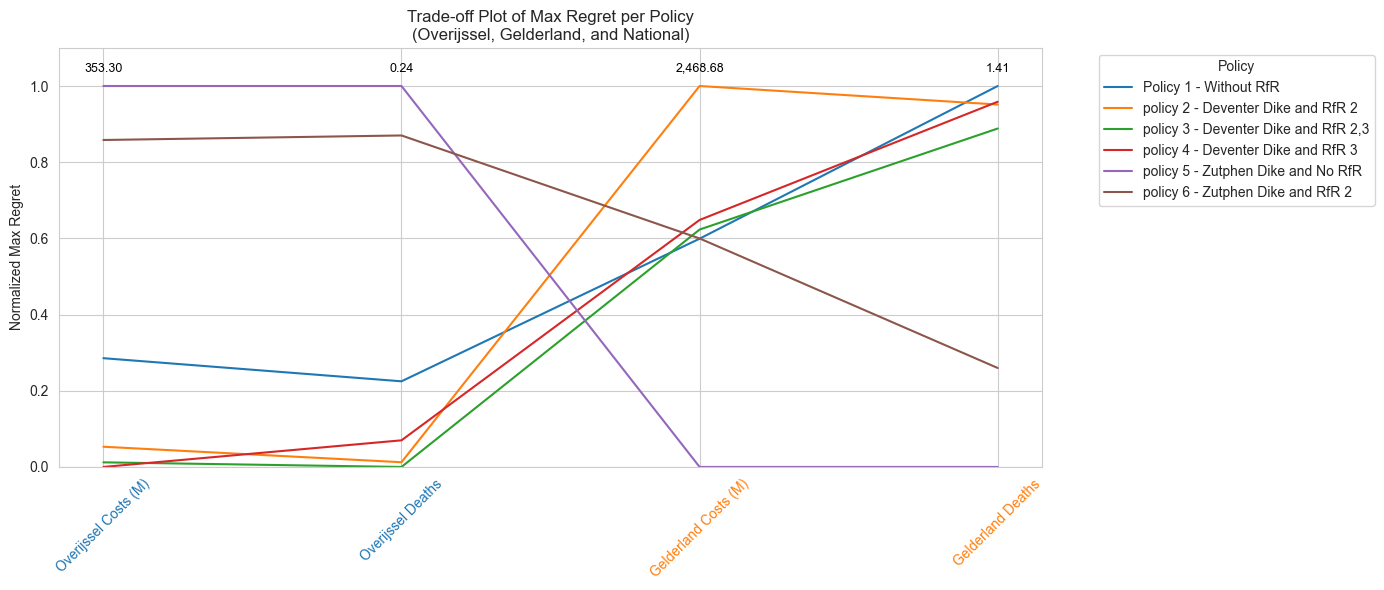

In [7]:
# local perspective
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Define ordered criteria and their attributes
desired_order = [
    'Overijssel Costs (M)',
    'Overijssel Deaths',
    'Gelderland Costs (M)',
    'Gelderland Deaths',
]

# Region/color assignment for x-axis labels
label_styles = {
    'Overijssel Costs (M)': {'color': 'tab:blue', 'weight': 'normal'},
    'Overijssel Deaths': {'color': 'tab:blue', 'weight': 'normal'},
    'Gelderland Costs (M)': {'color': 'tab:orange', 'weight': 'normal'},
    'Gelderland Deaths': {'color': 'tab:orange', 'weight': 'normal'},
}

# Reorder and normalize
max_regret_local = max_regret[desired_order]
normalized = pd.DataFrame(
    MinMaxScaler().fit_transform(max_regret_local),
    columns=desired_order,
    index=max_regret_local.index
)

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
for policy_id in normalized.index:
    ax.plot(desired_order, normalized.loc[policy_id], label=str(policy_id))

# Annotate max regret values
absolute_max = max_regret_local.max()
for i, col in enumerate(desired_order):
    ax.text(i, 1.03, f"{absolute_max[col]:,.2f}", ha='center', va='bottom',
            fontsize=9, color='black')

# Custom tick coloring and bolding
ax.set_xticks(range(len(desired_order)))
ax.set_xticklabels(desired_order, rotation=45)
for tick_label, col in zip(ax.get_xticklabels(), desired_order):
    tick_label.set_color(label_styles[col]['color'])
    tick_label.set_fontweight(label_styles[col]['weight'])

# Styling
ax.set_ylim(0, 1.1)
ax.set_ylabel("Normalized Max Regret")
ax.set_title("Trade-off Plot of Max Regret per Policy\n(Overijssel, Gelderland, and National)")
ax.legend(title="Policy", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
plt.tight_layout()
plt.show()


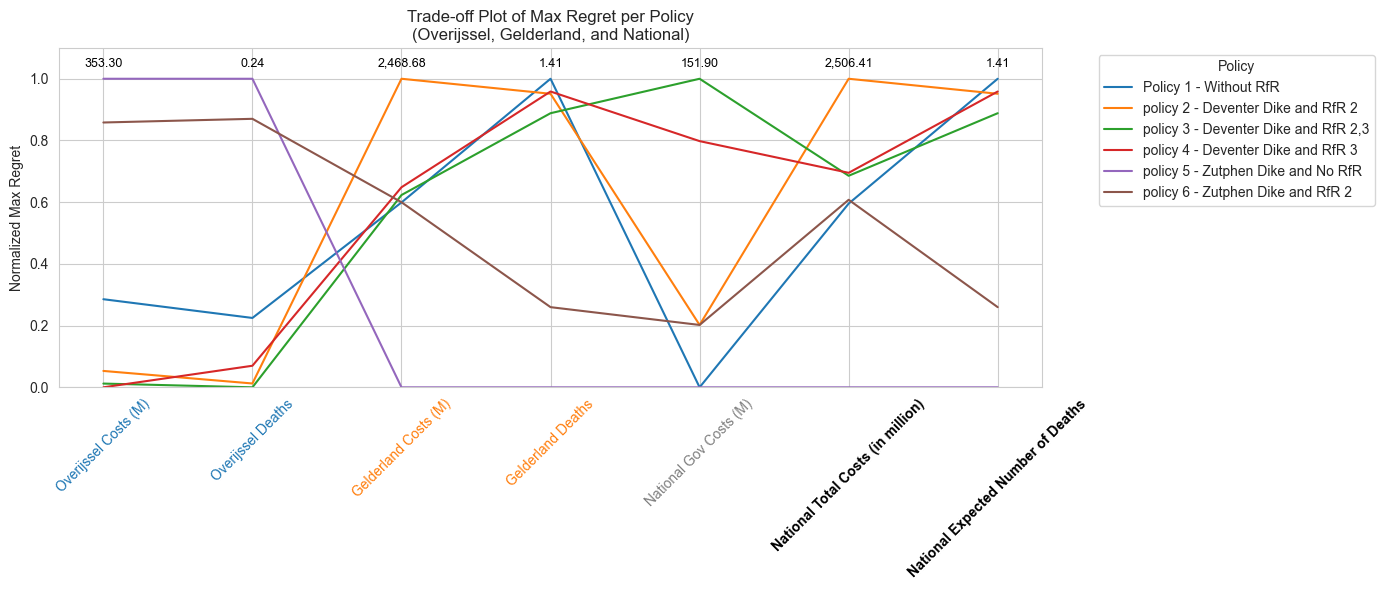

In [8]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Define ordered criteria and their attributes
desired_order = [
    'Overijssel Costs (M)',
    'Overijssel Deaths',
    'Gelderland Costs (M)',
    'Gelderland Deaths',
    'National Gov Costs (M)',
    'National Total Costs (in million)',
    'National Expected Number of Deaths'
]

# Region/color assignment for x-axis labels
label_styles = {
    'Overijssel Costs (M)': {'color': 'tab:blue', 'weight': 'normal'},
    'Overijssel Deaths': {'color': 'tab:blue', 'weight': 'normal'},
    'Gelderland Costs (M)': {'color': 'tab:orange', 'weight': 'normal'},
    'Gelderland Deaths': {'color': 'tab:orange', 'weight': 'normal'},
    'National Gov Costs (M)': {'color': 'gray', 'weight': 'normal'},
    'National Total Costs (in million)': {'color': 'black', 'weight': 'bold'},
    'National Expected Number of Deaths': {'color': 'black', 'weight': 'bold'}
}

# Reorder and normalize
max_regret = max_regret[desired_order]
normalized = pd.DataFrame(
    MinMaxScaler().fit_transform(max_regret),
    columns=desired_order,
    index=max_regret.index
)

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
for policy_id in normalized.index:
    ax.plot(desired_order, normalized.loc[policy_id], label=str(policy_id))

# Annotate max regret values
absolute_max = max_regret.max()
for i, col in enumerate(desired_order):
    ax.text(i, 1.03, f"{absolute_max[col]:,.2f}", ha='center', va='bottom',
            fontsize=9, color='black')

# Custom tick coloring and bolding
ax.set_xticks(range(len(desired_order)))
ax.set_xticklabels(desired_order, rotation=45)
for tick_label, col in zip(ax.get_xticklabels(), desired_order):
    tick_label.set_color(label_styles[col]['color'])
    tick_label.set_fontweight(label_styles[col]['weight'])

# Styling
ax.set_ylim(0, 1.1)
ax.set_ylabel("Normalized Max Regret")
ax.set_title("Trade-off Plot of Max Regret per Policy\n(Overijssel, Gelderland, and National)")
ax.legend(title="Policy", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
plt.tight_layout()
plt.show()


In [9]:
def weighted_regret_index(cost_regret, death_regret, w_cost=0.4, w_death=0.6):
    return w_cost * cost_regret + w_death * death_regret

summary_df = pd.DataFrame(index=max_regret.index)

summary_df['Local Regret Index'] = [
    weighted_regret_index(
        max_regret.loc[p, 'Overijssel Costs (M)'],
        max_regret.loc[p, 'Overijssel Deaths']
    ) for p in summary_df.index
]

summary_df['National Regret Index'] = [
    weighted_regret_index(
        max_regret.loc[p, 'National Total Costs (in million)'],
        max_regret.loc[p, 'National Expected Number of Deaths']
    ) for p in summary_df.index
]

from sklearn.preprocessing import MinMaxScaler

normalized = pd.DataFrame(
    MinMaxScaler().fit_transform(summary_df),
    columns=[f"{col} (Norm)" for col in summary_df.columns],
    index=summary_df.index
)


In [10]:
print(normalized)

                                      Local Regret Index (Norm)  \
Policy                                                            
Policy 1 - Without RfR                                 0.285368   
policy 2 - Deventer Dike and RfR 2                     0.052948   
policy 3 - Deventer Dike and RfR 2,3                   0.012011   
policy 4 - Deventer Dike and RfR 3                     0.000000   
policy 5 - Zutphen Dike and No RfR                     1.000000   
policy 6 - Zutphen Dike and RfR 2                      0.858267   

                                      National Regret Index (Norm)  
Policy                                                              
Policy 1 - Without RfR                                    0.595723  
policy 2 - Deventer Dike and RfR 2                        1.000000  
policy 3 - Deventer Dike and RfR 2,3                      0.685770  
policy 4 - Deventer Dike and RfR 3                        0.695400  
policy 5 - Zutphen Dike and No RfR               

In [11]:
# Local Perspective (squared)
def weighted_regret_index(cost_regret, death_regret, w_cost=0.4, w_death=0.6):
    return w_cost * cost_regret + w_death * death_regret

summary_df = pd.DataFrame(index=max_regret.index)

summary_df['Local Regret Index'] = [
    (
        weighted_regret_index(
            max_regret.loc[p, 'Overijssel Costs (M)'],
            max_regret.loc[p, 'Overijssel Deaths']
        ) - weighted_regret_index(
            max_regret.loc[p, 'Gelderland Costs (M)'],
            max_regret.loc[p, 'Gelderland Deaths']
        )
    ) ** 2
    for p in summary_df.index
]

summary_df['National Regret Index'] = [
    weighted_regret_index(
        max_regret.loc[p, 'National Total Costs (in million)'],
        max_regret.loc[p, 'National Expected Number of Deaths']
    ) for p in summary_df.index
]

from sklearn.preprocessing import MinMaxScaler

normalized = pd.DataFrame(
    MinMaxScaler().fit_transform(summary_df),
    columns=[f"{col} (Norm)" for col in summary_df.columns],
    index=summary_df.index
)


In [12]:
print(normalized)

                                      Local Regret Index (Norm)  \
Policy                                                            
Policy 1 - Without RfR                                 0.361918   
policy 2 - Deventer Dike and RfR 2                     1.000000   
policy 3 - Deventer Dike and RfR 2,3                   0.431110   
policy 4 - Deventer Dike and RfR 3                     0.464263   
policy 5 - Zutphen Dike and No RfR                     0.000000   
policy 6 - Zutphen Dike and RfR 2                      0.283786   

                                      National Regret Index (Norm)  
Policy                                                              
Policy 1 - Without RfR                                    0.595723  
policy 2 - Deventer Dike and RfR 2                        1.000000  
policy 3 - Deventer Dike and RfR 2,3                      0.685770  
policy 4 - Deventer Dike and RfR 3                        0.695400  
policy 5 - Zutphen Dike and No RfR               

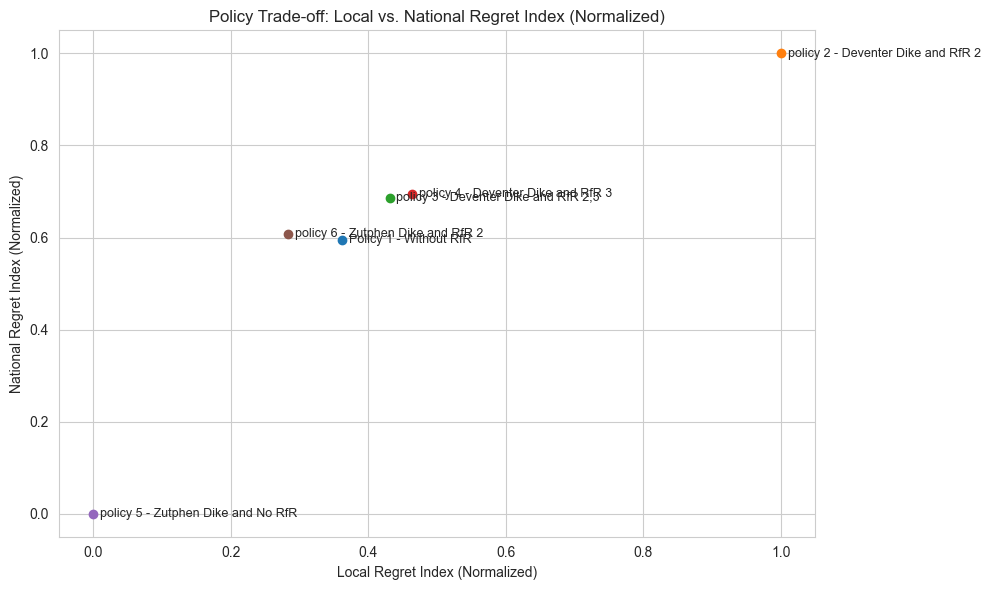

In [13]:
import matplotlib.pyplot as plt

# Scatter plot using existing normalized data
plt.figure(figsize=(10, 6))
for policy in normalized.index:
    x = normalized.loc[policy, 'Local Regret Index (Norm)']
    y = normalized.loc[policy, 'National Regret Index (Norm)']
    plt.scatter(x, y, label=policy)
    plt.text(x + 0.01, y, policy, fontsize=9, va='center')

plt.xlabel("Local Regret Index (Normalized)")
plt.ylabel("National Regret Index (Normalized)")
plt.title("Policy Trade-off: Local vs. National Regret Index (Normalized)")
plt.grid(True)
plt.tight_layout()
plt.show()
